In [1]:
import torch
import cv2
from PIL import Image
import numpy as np

import os

import warnings
warnings.filterwarnings('ignore')

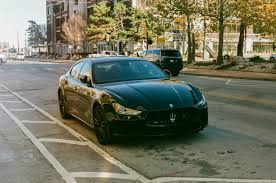

In [2]:
def load_image(image_path):
    image = Image.open(image_path)
    return image

img = load_image("images/image_1.jpg")
img

In [3]:
np.array(img).shape

(183, 276, 3)

In [4]:
def load_model():
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
    model.eval()
    return model

model = load_model()
model

Using cache found in C:\Users\MercadosEMI/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-10-19 Python-3.12.7 torch-2.5.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Model Inference

In [5]:
result = model(img)
result

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 183x276 4 cars, 1 truck
Speed: 24.0ms pre-process, 196.0ms inference, 13.0ms NMS per image at shape (1, 3, 448, 640)

In [6]:
result.pred

[tensor([[5.93244e+01, 5.67813e+01, 2.10336e+02, 1.46211e+02, 8.62352e-01, 2.00000e+00],
         [4.03779e-02, 5.35646e+01, 7.97448e+00, 6.40080e+01, 5.35506e-01, 2.00000e+00],
         [1.38230e+02, 4.80794e+01, 1.82482e+02, 7.66798e+01, 5.00441e-01, 2.00000e+00],
         [1.37800e+02, 4.83169e+01, 1.83312e+02, 7.63326e+01, 4.98568e-01, 7.00000e+00],
         [1.54697e+01, 5.26708e+01, 2.48863e+01, 6.03662e+01, 4.24714e-01, 2.00000e+00]])]

In [7]:
confidence = {}

for idx, res in enumerate(result.pred[0]):
    confidence[f"{result.names[res[5].item()]}_{idx}"] = res[4]

confidence

{'car_0': tensor(0.86235),
 'car_1': tensor(0.53551),
 'car_2': tensor(0.50044),
 'truck_3': tensor(0.49857),
 'car_4': tensor(0.42471)}

Detection of bounding box

In [8]:
def detect_boundary(result):
    detections = {}

    for idx, res in enumerate(result.pred[0]):
        if res[4].item() > 0.6:
            element = f"{result.names[res[5].item()]}_{idx}"
            detections[element] = {}
            detections[element]['confidence'] = res[4].item()
            detections[element]['class'] = result.names[res[5].item()]
            detections[element]['bbox'] = res[:4]

    return detections

detect_boundary(result=result)

{'car_0': {'confidence': 0.8623521327972412,
  'class': 'car',
  'bbox': tensor([ 59.32439,  56.78127, 210.33603, 146.21138])}}

In [9]:
imgn = [1, 2, 3, 5, 6, 8, 9, 10]

for i in imgn:
    image = load_image(f"images/image_{i}.jpg")
    result = model(image)
    bb = detect_boundary(result=result)
    print(bb)

{'car_0': {'confidence': 0.8623521327972412, 'class': 'car', 'bbox': tensor([ 59.32439,  56.78127, 210.33603, 146.21138])}}
{'car_0': {'confidence': 0.7347175478935242, 'class': 'car', 'bbox': tensor([172.10756, 103.97265, 221.78760, 140.23811])}}
{'bed_0': {'confidence': 0.8528490662574768, 'class': 'bed', 'bbox': tensor([ 413.23914,  526.95422, 1179.85254,  988.28394])}, 'potted plant_1': {'confidence': 0.7801806926727295, 'class': 'potted plant', 'bbox': tensor([1017.12683,  515.00006, 1135.08313,  633.25043])}}
{'person_0': {'confidence': 0.9551242589950562, 'class': 'person', 'bbox': tensor([190.25493,  50.11068, 246.10854, 181.12866])}, 'person_1': {'confidence': 0.9316143989562988, 'class': 'person', 'bbox': tensor([103.11487,  34.28029, 161.12727, 182.84975])}, 'person_2': {'confidence': 0.9099944829940796, 'class': 'person', 'bbox': tensor([ 47.58092,  52.54795, 101.47597, 182.69672])}}
{'tv_0': {'confidence': 0.8406280279159546, 'class': 'tv', 'bbox': tensor([105.84309,  52.2